### IMPORTING BASIC LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
df.duplicated().sum()

29

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [12]:
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars=df.select_dtypes(include = ['int32','int64','float32','float64']).columns

categorical_vars,numerical_vars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [13]:
def uniquevals(col):
    print(f'details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
for col in df.columns:
    uniquevals(col)
    valuecounts(col)
    print("-"*75)

details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
valuecounts of the particular col Company is : Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
---------------------------------------------------------------------------
details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
valuecounts of the particular col TypeName is : Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook             

In [14]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EXPLORATORY DATA ANALYSIS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

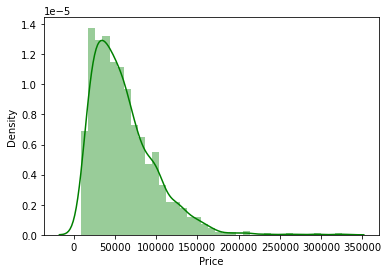

In [16]:
sns.distplot(df['Price'],color='green')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

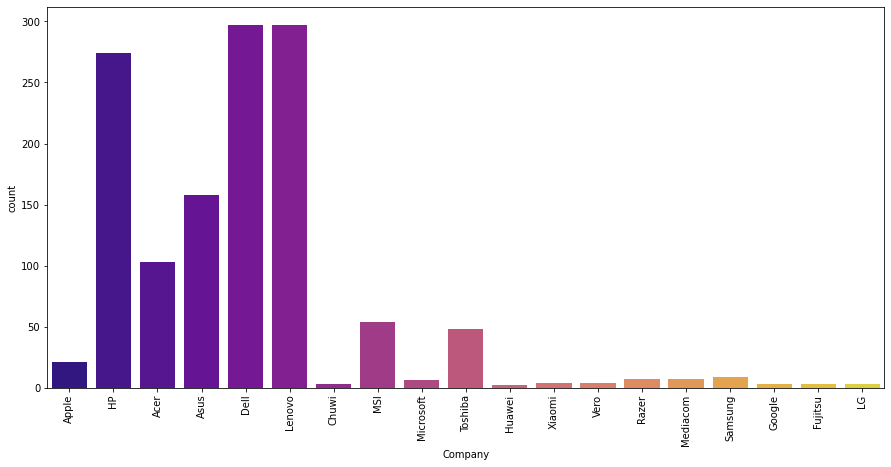

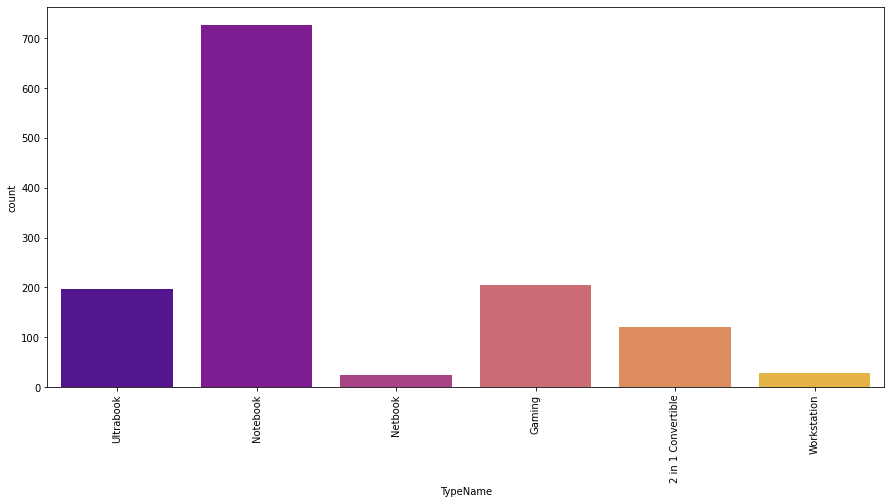

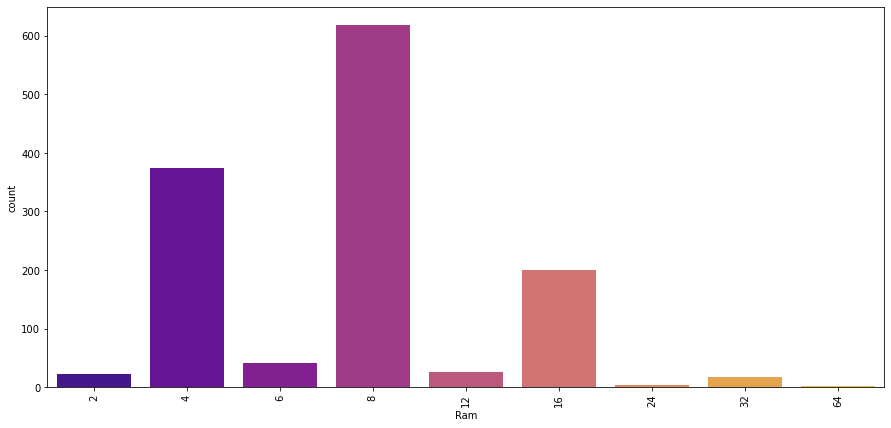

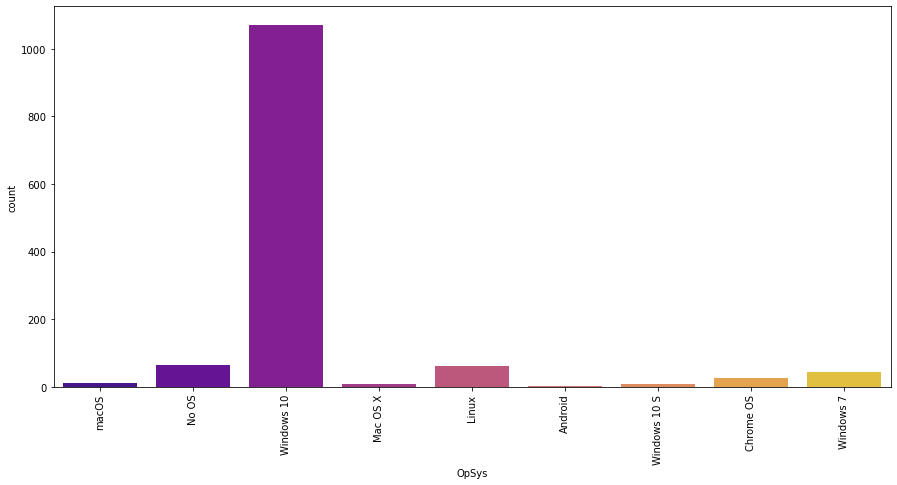

In [17]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
plots = ['Company','TypeName','Ram','OpSys']

for col in plots:
    drawplot(col)

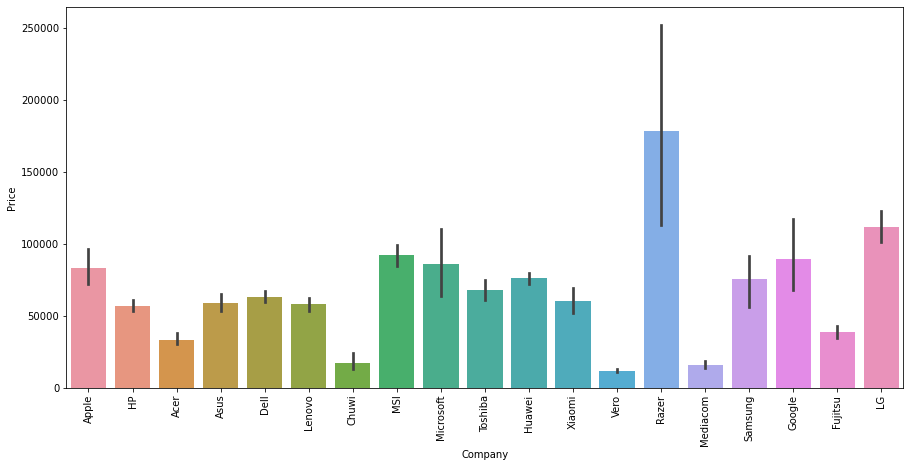

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


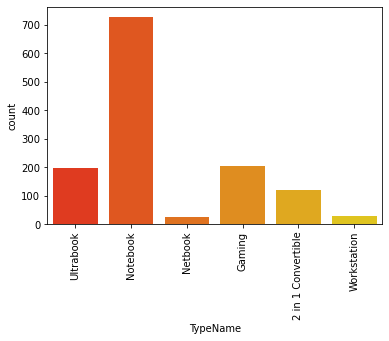

In [18]:
sns.countplot(df['TypeName'],palette = 'autumn')
plt.xticks(rotation='vertical')
plt.show()

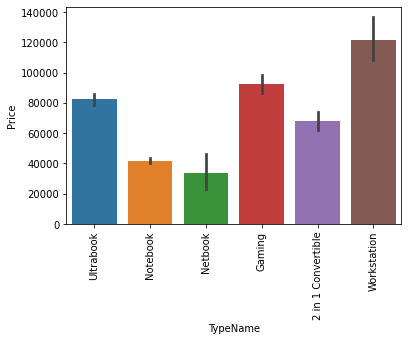

In [19]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

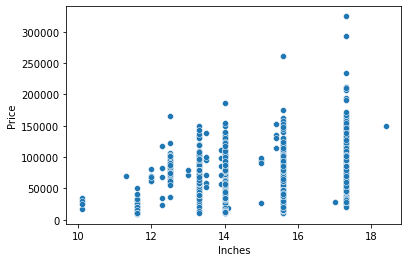

In [20]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [21]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [22]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [24]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


In [25]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1144,HP,2 in 1 Convertible,13.3,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,95850.7200,1
369,HP,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,93240.0000,0
288,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,62817.1200,0
767,Dell,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,58554.7200,1
392,Acer,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,36975.7872,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

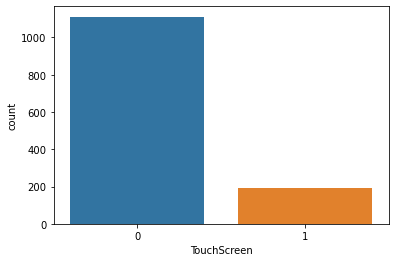

In [26]:
sns.countplot(df['TouchScreen'])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

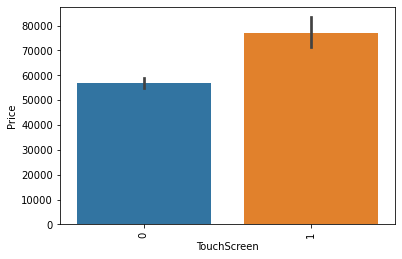

In [27]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])
plt.xticks(rotation = 'vertical')

In [28]:
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if 'IPS' in element else 0)

In [29]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
131,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,23922.7200,0,0
368,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.33,47898.7200,0,0
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,0,0
552,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,143802.7200,0,1
878,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.18,48618.0000,0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='count'>

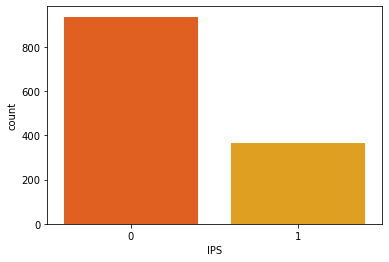

In [30]:
sns.countplot(df['IPS'],palette='autumn')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

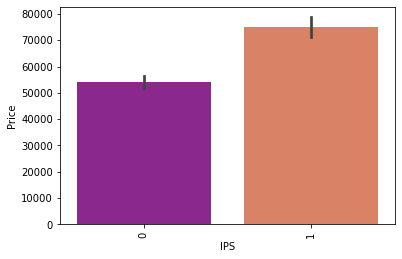

In [31]:
sns.barplot(x=df['IPS'],y=df['Price'],palette='plasma')
plt.xticks(rotation = 'vertical')

### EXTRACTING SCREEN RESOLUTION

In [32]:
splitdf = df['ScreenResolution'].str.split('x',n=1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [33]:
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [35]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


<AxesSubplot:>

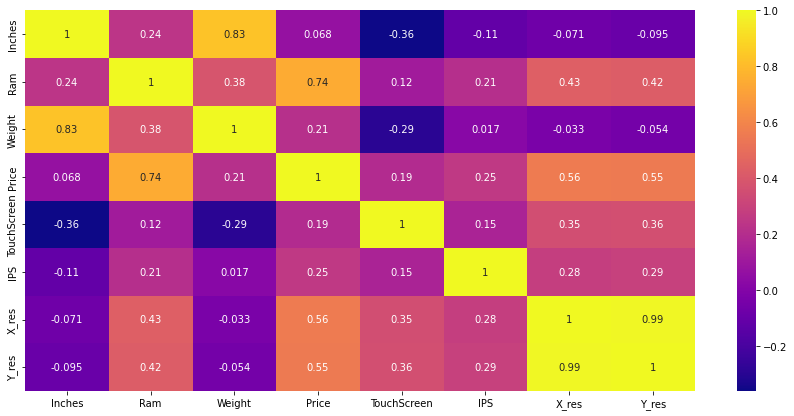

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [38]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [39]:
df['PPI'] = ((( df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [41]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [42]:
df.drop(columns = ['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [44]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [45]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head(50)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD A9-Series 9420
6,Apple,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7
7,Apple,Ultrabook,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5
8,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7
9,Acer,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5


In [46]:
def processortype(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other intel Processor'
        else:
            return 'AMD Processor'
        
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other intel Processor')])

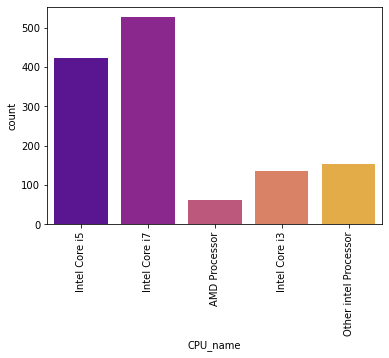

In [47]:
sns.countplot(df['CPU_name'],palette = 'plasma')
plt.xticks(rotation = 'vertical')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other intel Processor')])

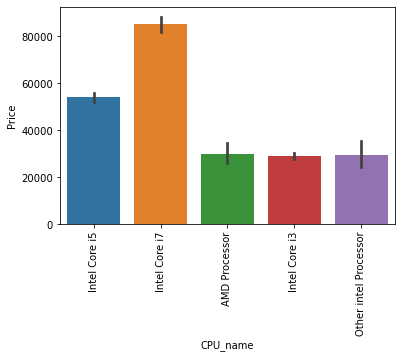

In [48]:
sns.barplot(df['CPU_name'],df['Price'])
plt.xticks(rotation='vertical')

In [49]:
df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


#### Analysis on RAM column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='count'>

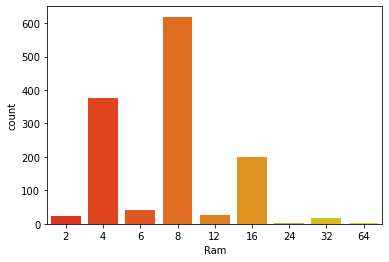

In [50]:
sns.countplot(df['Ram'],palette = 'autumn')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='Price'>

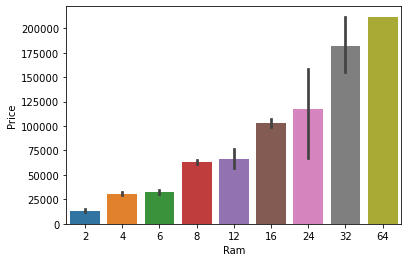

In [51]:
sns.barplot(df['Ram'],df['Price'])

In [52]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [53]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [54]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)

df['Memory'] = df['Memory'].str.replace('GB','')

df['Memory'] = df['Memory'].str.replace('TB','000')

newdf = df['Memory'].str.split("+",n=1,expand=True)
newdf


,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [55]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [56]:
def applychanges(value):
    df['layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
applylist = ['HDD','SSD','Hybrid','FlashStorage']

for value in applylist:
    applychanges(value)
    
df.head()
    

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,layer1HDD,layer1SSD,layer1Hybrid,layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [57]:
df['first'] = df['first'].str.replace(r'\D','',regex=True)
df['first'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [58]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,layer1HDD,layer1SSD,layer1Hybrid,layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0


In [59]:
df['second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,layer1HDD,layer1SSD,layer1Hybrid,layer1FlashStorage,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [60]:
def applychanges1(value):
    df['layer2'+value] = df['second'].apply(lambda x:1 if value in x else 0)
    
applylist_1 = ['HDD','SSD','Hybrid','FlashStorage']
df['second']=df['second'].fillna("0")

for value in applylist_1:
    applychanges1(value)
    
df['second'] = df['second'].str.replace(r'\D','',regex=True)
df['second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [61]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,layer1HDD,layer1SSD,layer1Hybrid,layer1FlashStorage,second,layer2HDD,layer2SSD,layer2Hybrid,layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [62]:
df['first'] = df['first'].astype('int')

In [63]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'first', 'layer1HDD',
       'layer1SSD', 'layer1Hybrid', 'layer1FlashStorage', 'second',
       'layer2HDD', 'layer2SSD', 'layer2Hybrid', 'layer2FlashStorage'],
      dtype='object')

In [64]:
df['second'] = df['second'].astype('int')


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Ram                 1303 non-null   int32  
 3   Memory              1303 non-null   object 
 4   Gpu                 1303 non-null   object 
 5   OpSys               1303 non-null   object 
 6   Weight              1303 non-null   float32
 7   Price               1303 non-null   float64
 8   TouchScreen         1303 non-null   int64  
 9   IPS                 1303 non-null   int64  
 10  PPI                 1303 non-null   float64
 11  CPU_name            1303 non-null   object 
 12  first               1303 non-null   int32  
 13  layer1HDD           1303 non-null   int64  
 14  layer1SSD           1303 non-null   int64  
 15  layer1Hybrid        1303 non-null   int64  
 16  layer1

In [66]:
df['HDD'] = (df['first']*df['layer1HDD']+df['second']*df['layer2HDD'])

df['SSD'] = (df['first']*df['layer1SSD']+df['second']*df['layer2SSD'])

df['Hybrid'] = (df['first']*df['layer1Hybrid']+df['second']*df['layer2Hybrid'])

df['flash_storage'] = (df['first']*df['layer1FlashStorage']+df['second']*df['layer2FlashStorage'])



In [67]:
df.drop(columns = ['first','second','layer1HDD','layer1SSD','layer1Hybrid','layer1FlashStorage','layer2HDD','layer2SSD','layer2Hybrid','layer2FlashStorage'],inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   TouchScreen    1303 non-null   int64  
 9   IPS            1303 non-null   int64  
 10  PPI            1303 non-null   float64
 11  CPU_name       1303 non-null   object 
 12  HDD            1303 non-null   int64  
 13  SSD            1303 non-null   int64  
 14  Hybrid         1303 non-null   int64  
 15  flash_storage  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(6)
memory usage: 152.8+ KB


In [69]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD',
       'Hybrid', 'flash_storage'],
      dtype='object')

In [70]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,flash_storage
865,HP,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,2.070,48484.80,0,0,141.211998,Intel Core i5,500,0,0,0
441,Dell,Notebook,4,256 SSD,AMD Radeon 530,Windows 10,2.200,39906.72,0,0,141.211998,Intel Core i5,0,256,0,0
1213,Dell,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,2.191,53226.72,1,1,141.211998,Intel Core i5,0,256,0,0
629,Dell,Notebook,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.000,96969.60,0,0,141.211998,Intel Core i7,0,256,0,0
266,Asus,2 in 1 Convertible,8,512 SSD + 512 SSD,Intel UHD Graphics 620,Windows 10,1.100,79866.72,1,0,165.632118,Intel Core i7,0,1024,0,0


In [71]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
flash_storage         NaN
Name: Price, dtype: float64

In [72]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD',
       'Hybrid', 'flash_storage'],
      dtype='object')

In [74]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [75]:
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gpu_brand', ylabel='count'>

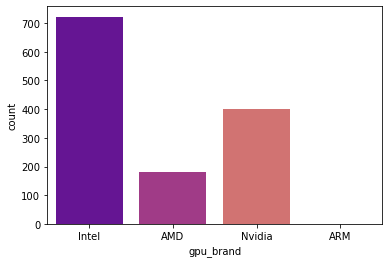

In [76]:
df['gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(df['gpu_brand'],palette = 'plasma')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gpu_brand', ylabel='count'>

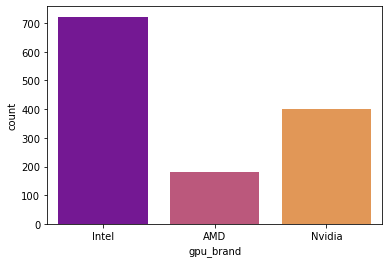

In [77]:
df = df[df['gpu_brand']!='ARM']
sns.countplot(df['gpu_brand'],palette='plasma')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gpu_brand', ylabel='Price'>

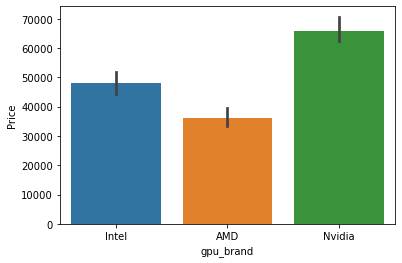

In [78]:
sns.barplot(df['gpu_brand'],df['Price'],estimator=np.median)

In [79]:
df.drop(columns=['Gpu'])

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,flash_storage,gpu_brand
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,0,Intel
2,HP,Notebook,8,256 SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,2,64 Flash Storage,Windows 10,1.50,12201.1200,0,0,111.935204,Other intel Processor,0,0,0,0,Intel
1301,HP,Notebook,6,1000 HDD,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD


In [80]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


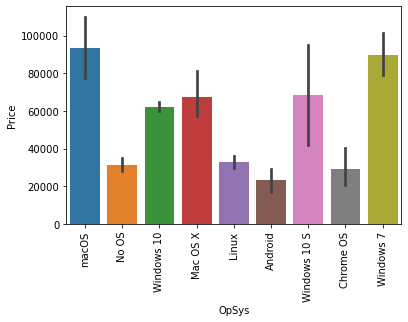

In [81]:
sns.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [82]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [83]:
def setcatg(text):
    if text=='Windows 10' or text=='Windows 7' or text == 'Windows 10 S':
        return 'windows'
    elif text=="Mac OS X" or text == 'macOS':
        return 'mac'
    else:
        return 'Other'
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcatg(x))
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,flash_storage,gpu_brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,0,Intel
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [84]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,flash_storage,gpu_brand
344,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,windows,1.20,84129.1200,0,0,165.632118,Intel Core i7,0,256,0,0,Intel
1163,Lenovo,Notebook,8,1000 HDD,Intel HD Graphics 520,windows,2.20,24455.5200,0,0,100.454670,Intel Core i3,1000,0,0,0,Intel
52,HP,Notebook,4,256 SSD,AMD Radeon R4 Graphics,windows,1.86,21231.5472,0,0,141.211998,AMD Processor,0,256,0,0,AMD
1106,MSI,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,windows,2.90,80516.2032,0,0,127.335675,Intel Core i7,1000,128,0,0,Nvidia
432,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 620,windows,1.70,31914.7200,0,1,157.350512,Intel Core i3,0,128,0,0,Intel


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='count'>

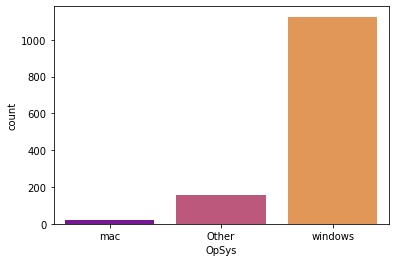

In [85]:
sns.countplot(df['OpSys'],palette = 'plasma')

(array([0, 1, 2]),
 [Text(0, 0, 'mac'), Text(1, 0, 'Other'), Text(2, 0, 'windows')])

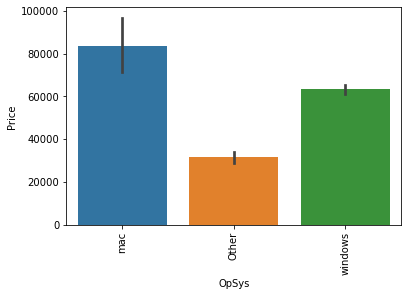

In [86]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

#### analysis for weight

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

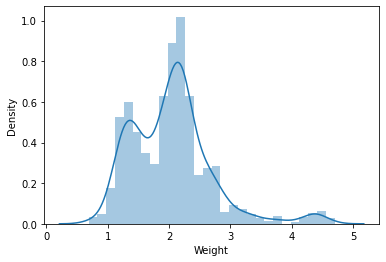

In [87]:
sns.distplot(df['Weight'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Price'>

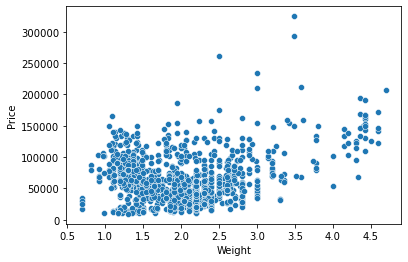

In [88]:
sns.scatterplot(df['Weight'],df['Price'])

#### price analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

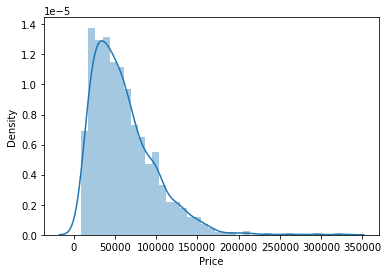

In [89]:
sns.distplot(df['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

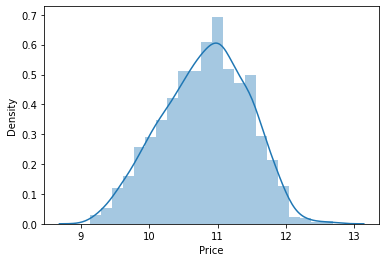

In [90]:
sns.distplot(np.log(df['Price']))

In [91]:
df.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
TouchScreen      0.192917
IPS              0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
flash_storage         NaN
Name: Price, dtype: float64

In [92]:
df.drop(columns=['Hybrid','flash_storage'],inplace=True)

In [93]:
df.drop(columns=['Memory'],inplace=True)

In [94]:
df.drop(columns=['Gpu'],inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   TouchScreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   PPI          1302 non-null   float64
 9   CPU_name     1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  gpu_brand    1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 164.5+ KB


<AxesSubplot:>

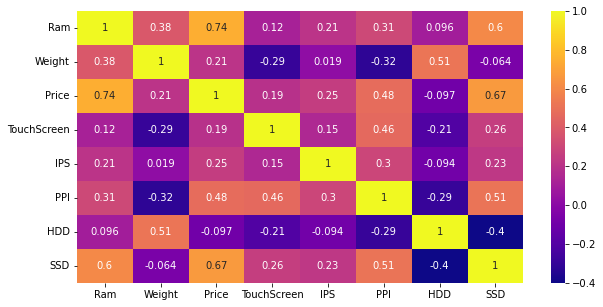

In [96]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

## MODEL BUILDING

In [97]:
list(df['Price'])[:5]

[71378.6832, 47895.5232, 30636.0, 135195.33599999998, 96095.808]

In [98]:
np.log(71378.6832)

11.175754549129524

In [99]:
np.exp(11.175754549129524)

71378.68320000001

In [100]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [101]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis=1)

In [102]:
test

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [104]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'TouchScreen',
       'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'gpu_brand'],
      dtype='object')

In [105]:
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

In [106]:
X_train.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'TouchScreen', 'IPS',
       'PPI', 'CPU_name', 'HDD', 'SSD', 'gpu_brand'],
      dtype='object')

In [107]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'gpu_brand'}

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 183 to 1193
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1106 non-null   object 
 1   TypeName     1106 non-null   object 
 2   Ram          1106 non-null   int32  
 3   OpSys        1106 non-null   object 
 4   Weight       1106 non-null   float32
 5   TouchScreen  1106 non-null   int64  
 6   IPS          1106 non-null   int64  
 7   PPI          1106 non-null   float64
 8   CPU_name     1106 non-null   object 
 9   HDD          1106 non-null   int64  
 10  SSD          1106 non-null   int64  
 11  gpu_brand    1106 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(4), object(5)
memory usage: 103.7+ KB


### Linear Regression

In [110]:
s1 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')


In [111]:
s2 = LinearRegression()

pipe = Pipeline([('s1',s1),('s2',s2)])



In [112]:

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.8073277448418656
MAE 0.2101782797642849


In [113]:
np.exp(0.21)

1.2336780599567432

### Ridge Regression

In [114]:
s1 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

s2 = Ridge(alpha=10)

pipe = Pipeline([('s1',s1),('s2',s2)])


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 SCORE 0.812638042856822
MAE 0.20960380737000883


### Lasoo Regression

In [115]:
s1 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

s2 = Lasso(alpha=0.001)

pipe = Pipeline([('s1',s1),('s2',s2)])


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 SCORE 0.8070663179863784
MAE 0.21137413078474684


## KNN

In [116]:
step_1 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step_2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([('step_1',step_1),('step_2',step_2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 SCORE 0.7953974653778931
MAE 0.19979838694662


### Decision Tree

In [117]:
s1 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

s2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('s1',s1),('s2',s2)])


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.8437345295079456
MAE 0.1805554033956052


### Random Forest

In [129]:
s1 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

s2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([('s1',s1),('s2',s2)])


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.8865662483648037
MAE 0.15976193383670384


## SVM

In [119]:
step_a = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step_b = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([('step_a',step_a),('step_b',step_b)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.8072523491696697
MAE 0.20249880424487393


## EXTRATREES

In [120]:
from sklearn.ensemble import ExtraTreesRegressor

In [121]:
step1 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators = 100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.8792016637067412
MAE 0.15864990022163417


## AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostRegressor 

In [123]:
step_11 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step_22 = AdaBoostRegressor(n_estimators = 15,learning_rate=1.0)

pipe = Pipeline([('step_11',step_11),('step_22',step_22)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.7972372620980042
MAE 0.22996767862833437


## Gradient Boost

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
step_aa = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step_bb = GradientBoostingRegressor(n_estimators = 500)

pipe = Pipeline([('step_aa',step_aa),('step_bb',step_bb)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.8799216459095432
MAE 0.15906974303580224


## XgBoost

In [126]:
step11 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step22 = XGBRegressor(n_estimators = 45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([('step11',step11),('step22',step22)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.8780478787306367
MAE 0.1636936397330588


## VOTING REGRESSOR

In [127]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1a = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt =  GradientBoostingRegressor(n_estimators = 100,max_features=0.5)
xgb = XGBRegressor(n_estimators = 25,max_depth=5,learning_rate=0.3)
et = ExtraTreesRegressor(n_estimators = 100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

step2a = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe = Pipeline([('step1a',step1a),('step2a',step2a)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 SCORE 0.8924947830124988
MAE 0.15649324045345178


## STACKING

In [128]:
step11a = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

estimators = [
    ('rf',RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators = 100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators = 25,max_depth=5,learning_rate=0.3))
]
               
                
            
            


step22a = StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))

pipe = Pipeline([('step11a',step11a),('step22a',step22a)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 SCORE 0.8826016936618333
MAE 0.1662993057105394


In [124]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [125]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


### Hyperparameter tuning for Random forest

In [136]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)

In [137]:
transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'gpu_brand']

In [138]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_mac,OpSys_windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other intel Processor,gpu_brand_Intel,gpu_brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,1,0,0,1,0,0,1,0


In [139]:
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 38), (196, 38))

[Text(429.9827979627521, 478.60434782608695, 'Ram <= 7.0\nmse = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(191.2179005367599, 457.3330434782609, 'CPU_name_Other intel Processor <= 0.5\nmse = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(125.48419811320754, 436.0617391304348, 'CPU_name_Intel Core i5 <= 0.5\nmse = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(83.32878659726741, 414.7904347826087, 'CPU_name_Intel Core i7 <= 0.5\nmse = 0.08\nsamples = 154\nvalue = 10.233'),
 Text(35.03201691607027, 393.5191304347826, 'Weight <= 1.645\nmse = 0.07\nsamples = 135\nvalue = 10.183'),
 Text(7.43515940143136, 372.24782608695654, 'TypeName_Ultrabook <= 0.5\nmse = 0.064\nsamples = 10\nvalue = 10.587'),
 Text(5.57636955107352, 350.9765217391304, 'Company_Asus <= 0.5\nmse = 0.02\nsamples = 8\nvalue = 10.478'),
 Text(4.6469746258946, 329.70521739130436, 'Company_Lenovo <= 0.5\nmse = 0.011\nsamples = 7\nvalue = 10.516'),
 Text(3.71757970071568, 308.43391304347824, 'Weight <= 1.615\nmse = 0.003\nsampl

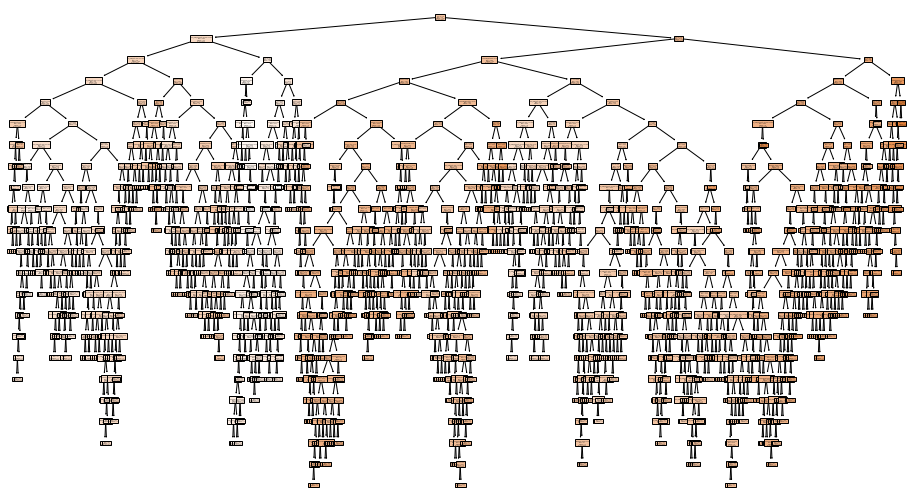

In [140]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [141]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [142]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

In [143]:
alphalist

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.2848874064377942e-16, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.9273311096566912e-16, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.0138040321099547e-12, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.2592089316201348e-11, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.3965826686794316e-11, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.815930086631128e-11, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.0857794550938246e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.9041331099769524e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=3.5205286626453813e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.910491976873067e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.341511312024845e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.6726438373801154e-09, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.7588587672910401e-09, random_state=0),
 

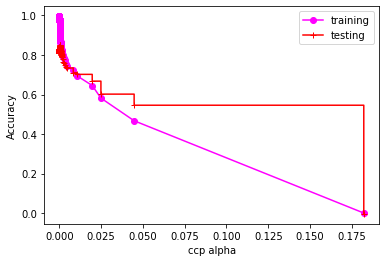

In [144]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker='o',label='training',color='magenta')

plt.plot(ccp_alphas,test_score,marker = '+',label='testing',color='red',drawstyle='steps-post')

plt.legend()
plt.show()

#### possible values for alpha can be [0.0025--->0.0075]

[Text(446.4, 440.31600000000003, 'Ram <= 7.0\nmse = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(223.2, 342.468, 'CPU_name_Other intel Processor <= 0.5\nmse = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(111.6, 244.62, 'mse = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(334.79999999999995, 244.62, 'mse = 0.084\nsamples = 106\nvalue = 9.781'),
 Text(669.5999999999999, 342.468, 'Ram <= 14.0\nmse = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(558.0, 244.62, 'TypeName_Notebook <= 0.5\nmse = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(446.4, 146.772, 'mse = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(669.5999999999999, 146.772, 'PPI <= 114.881\nmse = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(558.0, 48.924000000000035, 'mse = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(781.1999999999999, 48.924000000000035, 'mse = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(781.1999999999999, 244.62, 'mse = 0.12\nsamples = 191\nvalue = 11.558')]

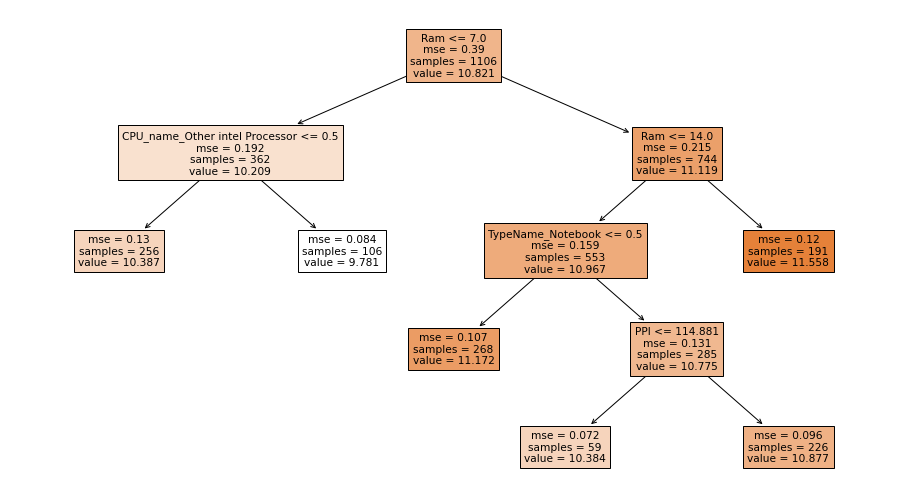

In [145]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [146]:
params = {
    
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse","mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    
    'Decision Tree' :{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse","mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha' : [x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf': [2,5,10,14],
        }
    }
}

In [147]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    
    clf.fit(X_train,y_train)
    
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=8, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   0.9s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=8, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   0.9s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=8, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   0.9s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=8, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   0.9s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=8, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   0.9s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=833; total time=   1.4s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=833; total time=   1.4s
[CV] E

[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=1, max_feature

In [148]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.070191,"(DecisionTreeRegressor(ccp_alpha=0.0025, crite..."
1,Decision Tree,-0.105890,"DecisionTreeRegressor(ccp_alpha=0.005, max_dep..."


In [149]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.07019134134978791,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='mae', max_depth=22,
                        min_samples_leaf=5, min_samples_split=14,
                        n_estimators=466)},
 {'model_name': 'Decision Tree',
  'best_score': -0.10589009406136288,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, max_depth=15, max_features='auto',
                        min_samples_leaf=10, min_samples_split=10)}]

In [150]:
rf = RandomForestRegressor(ccp_alpha=0.0025,max_depth=22,min_samples_leaf=14,min_samples_split=5,n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)

print(metrics.r2_score(y_test,y_pred))

0.8865662483648037


### Prediction on whole dataset

In [151]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

[array([11.24380583]),
 array([11.17098869]),
 array([10.79592668]),
 array([11.5668736]),
 array([11.25909895]),
 array([10.21264517]),
 array([11.55881217]),
 array([11.17098869]),
 array([11.5176794]),
 array([11.02553127]),
 array([10.49346318]),
 array([10.2072626]),
 array([11.56489495]),
 array([10.22829452]),
 array([11.25932797]),
 array([11.25909895]),
 array([10.90983386]),
 array([11.5668736]),
 array([10.69233363]),
 array([11.21188541]),
 array([9.77830324]),
 array([10.98691259]),
 array([10.19251148]),
 array([11.02553127]),
 array([11.09731991]),
 array([10.21220118]),
 array([11.17098869]),
 array([10.88750849]),
 array([11.08260995]),
 array([10.79191375]),
 array([9.78104778]),
 array([10.3343518]),
 array([10.22784029]),
 array([11.56610999]),
 array([11.17098869]),
 array([9.78104778]),
 array([10.19236881]),
 array([10.92536667]),
 array([10.5128716]),
 array([10.89039061]),
 array([10.20756392]),
 array([11.43392631]),
 array([10.3893615]),
 array([10.4981037]),

In [152]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [153]:
df['Predicted Price'] = np.array(ans)

df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,gpu_brand,Predicted Price
0,Apple,Ultrabook,8,mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,76405.184232
1,Apple,Ultrabook,8,mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,71039.312003
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,48821.529797
3,Apple,Ultrabook,16,mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,105542.985595
4,Apple,Ultrabook,8,mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,77582.638537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,31199.943162
1299,Lenovo,2 in 1 Convertible,16,windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,105462.423406
1300,Lenovo,Notebook,2,windows,1.50,12201.1200,0,0,111.935204,Other intel Processor,0,0,Intel,17640.674365
1301,HP,Notebook,6,windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,28748.296467


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


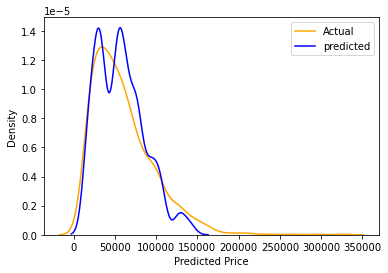

In [154]:
sns.distplot(df['Price'],hist=False,color='orange',label='Actual')
sns.distplot(df['Predicted Price'],hist=False,color='blue',label='predicted')
plt.legend()
plt.show()

### RF 2

In [155]:
rf1 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

rf1.fit(X_train,y_train)


print(f'R2 Score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 Score : 0.8860161755552483


In [156]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

[array([11.22082817]),
 array([10.85502578]),
 array([10.57172748]),
 array([11.82024085]),
 array([11.3250714]),
 array([9.92586809]),
 array([11.50776011]),
 array([10.85502578]),
 array([11.44868081]),
 array([10.81738706]),
 array([10.25178437]),
 array([9.9502977]),
 array([11.73032988]),
 array([10.21704806]),
 array([11.16781385]),
 array([11.3250714]),
 array([10.7466663]),
 array([11.82024085]),
 array([10.31010744]),
 array([11.01659329]),
 array([9.47176089]),
 array([10.90889676]),
 array([9.74715449]),
 array([10.81558457]),
 array([10.84703639]),
 array([10.08355856]),
 array([10.88517378]),
 array([10.67037624]),
 array([11.19071744]),
 array([10.77487732]),
 array([9.65550261]),
 array([9.91454685]),
 array([10.16613368]),
 array([11.6401669]),
 array([10.88517378]),
 array([9.60244985]),
 array([9.93806342]),
 array([10.866426]),
 array([10.3397072]),
 array([10.80462596]),
 array([10.0121424]),
 array([11.26549938]),
 array([10.38091089]),
 array([10.55311216]),
 arra

In [157]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [158]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,gpu_brand,Predicted Price
0,Apple,Ultrabook,8,mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,74669.588279
1,Apple,Ultrabook,8,mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,51793.802656
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,39016.014960
3,Apple,Ultrabook,16,mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,135976.974576
4,Apple,Ultrabook,8,mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,82873.563804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,36177.748270
1299,Lenovo,2 in 1 Convertible,16,windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,86590.508975
1300,Lenovo,Notebook,2,windows,1.50,12201.1200,0,0,111.935204,Other intel Processor,0,0,Intel,12908.774655
1301,HP,Notebook,6,windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,38262.621988


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


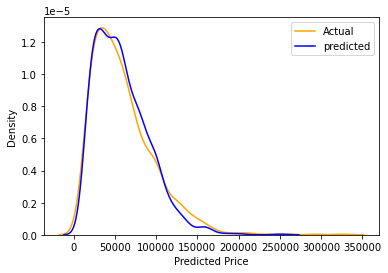

In [159]:
sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Price'],hist=False,color='blue',label='predicted')
plt.legend()
plt.show()

In [161]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(train,test,test_size=0.15,random_state=2)

X_train_1.shape,X_test_1.shape

((1106, 38), (196, 38))

## Final Random Forest Model

In [131]:
s_1 = ColumnTransformer(transformers =[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

s_2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([('s_1',s_1),('s_2',s_2)])


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 SCORE',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 SCORE 0.8865662483648037
MAE 0.15976193383670384


## EXPORTING THE MODEL

In [132]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [133]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,windows,1.50,12201.1200,0,0,111.935204,Other intel Processor,0,0,Intel
1301,HP,Notebook,6,windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [134]:
X_train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,gpu_brand
183,Toshiba,Notebook,8,windows,2.00,0,0,100.454670,Intel Core i5,0,128,Intel
1141,MSI,Gaming,8,windows,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia
1049,Asus,Netbook,4,Other,1.20,0,0,135.094211,Other intel Processor,0,0,Intel
1020,Dell,2 in 1 Convertible,4,windows,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel
878,Dell,Notebook,4,windows,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,windows,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia
299,Asus,Ultrabook,16,windows,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia
493,Acer,Notebook,8,windows,2.20,0,0,100.454670,AMD Processor,1000,0,AMD
527,Lenovo,Notebook,8,Other,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia


In [137]:
import sklearn
print(sklearn.__version__)

0.24.2
